KMeans algorithm for Image compression by reducing the number of colors that occur in an image to only those that are most common in that image


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *


### Finding the closest centroids

In [15]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)
    return idx

In [16]:
X = load_data()

In [17]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [18]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 2 1]
All tests passed!


### Computing Centroid Means


In [20]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis=0)
    return centroids
    

In [21]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


In [25]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress = False):
    m, n = X.shape
    K = initial_centroids.shape[0] # no of centroids
    
    centroids = initial_centroids
    previous_centroids = centroids
    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)

    plt.show()
    return centroids, idx


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


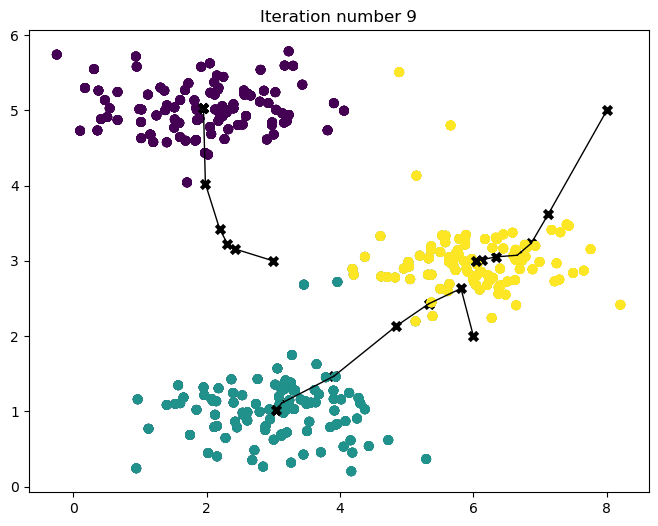

In [26]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

### Random Initialization 


In [54]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [55]:
np.random.permutation(5)

array([4, 3, 2, 0, 1])

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


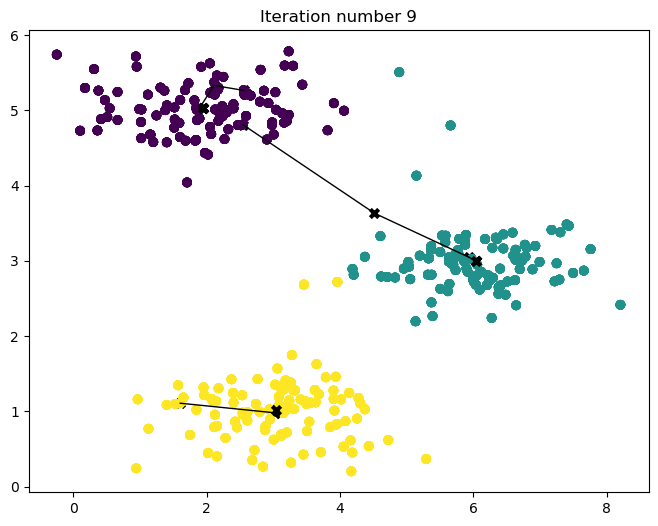

In [60]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Image Compression with K-Means


each pixel is encoded with RGB 

It has 1000 of colors, we have to reduce it to 16 colors

So, we can compress the photo efficiently

Store the RGB values of 16 selected colors, and for each pixel in the image you need to only store the index of the color at the location 

 find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.

 Then, use 16 colors to replace the pixels in the original image

In [67]:
original_img = plt.imread('bird_small.png')

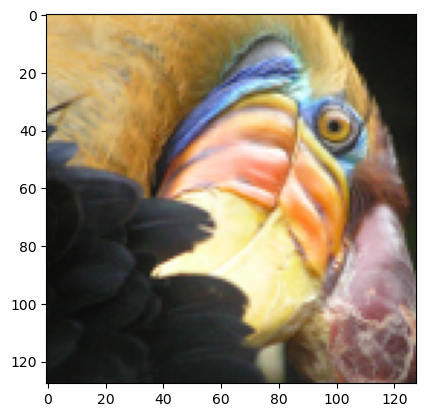

In [68]:
plt.imshow(original_img)

In [69]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


original_img[50, 33, 2] gives the blue intensity of the pixel at row 50 and column 33.

In [70]:
original_img[50, 33, 2]

0.19607843

To call the run_kMeans, you need to first transform the matrix original_img into a two-dimensional matrix.

The code below reshapes the matrix original_img to create an  𝑚×3
  matrix of pixel colors (where  𝑚=16384=128×128
 )

In [71]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [73]:
K = 16 # 16 clusters
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [74]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [2 2 2 2 2]


In [75]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [2 2 2 2 2]


In [80]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape)

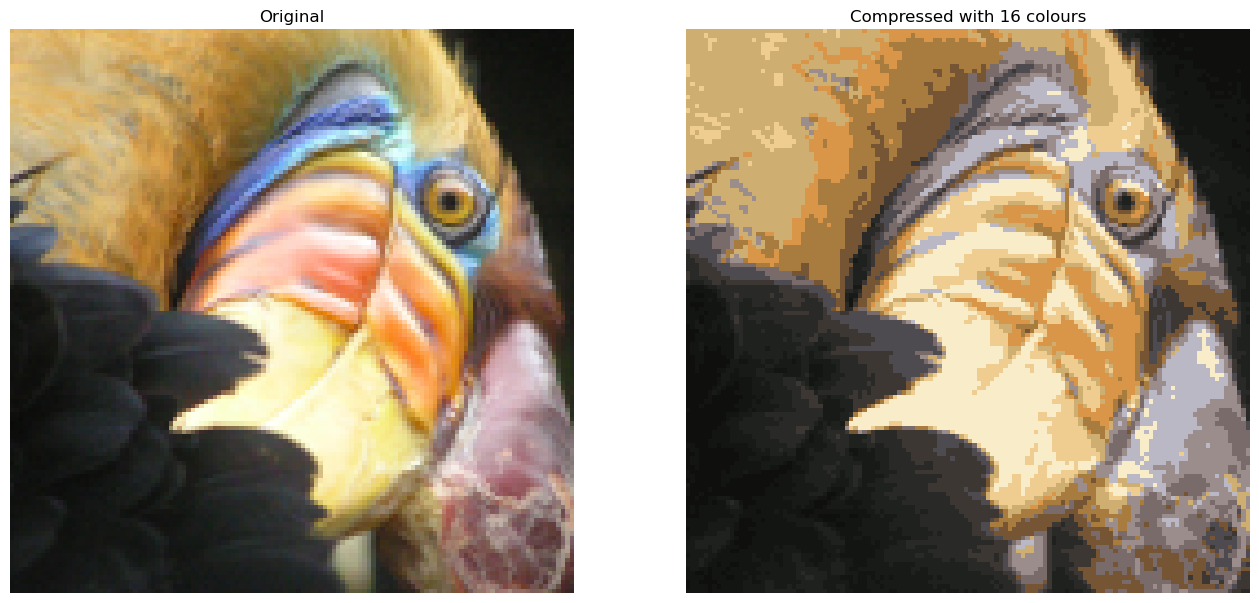

In [81]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()